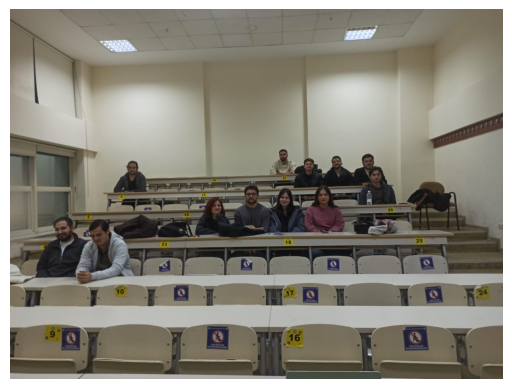

In [2]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith(".jpg") or file_name.endswith(".png") or file_name.endswith(".jpeg") or file_name.endswith(".webp"):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma
def resize_image(image, scale=0.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class4.jpeg"
    test_image = cv2.imread(test_image_path)
    
    # Görüntüyü yeniden boyutlandır
    resized_test_image = resize_image(test_image, scale=0.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN daha hassastır
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)
        
        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)
        
        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord * 2) for coord in face_location]  # Koordinatları geri ölçekle
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


# resmi yakınlaştırma

Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: riza_karakaya2
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: aylin_irem_acar3
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: batuhan_yesilyayla1


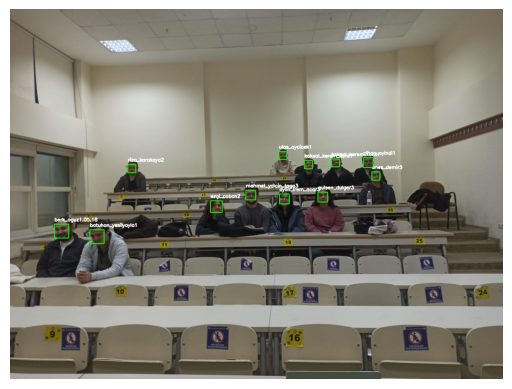

In [3]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class4.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: X
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: X
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: batuhan_yesilyayla1


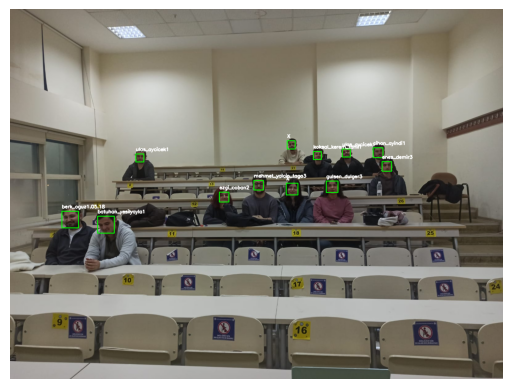

In [4]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class3.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: aylin_irem_acar3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: X


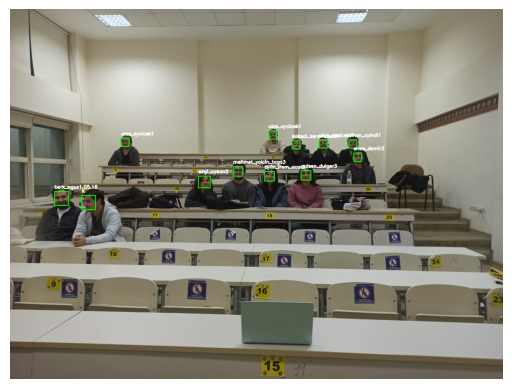

In [5]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class5.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


Yoklama kaydedildi: riza_karakaya2
Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: X
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: batuhan_yesilyayla1
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: ulas_aycicek1


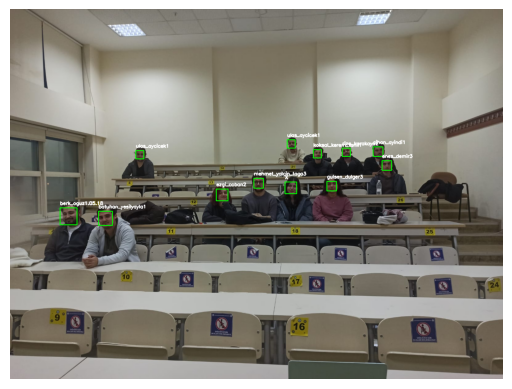

In [6]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class2.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: X
Yoklama kaydedildi: X
Yoklama kaydedildi: X
Yoklama kaydedildi: batuhan_yesilyayla1
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: X
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: X
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: X


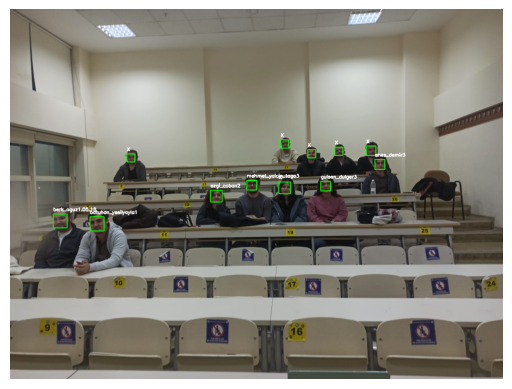

In [8]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name):
    with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
        now = datetime.now()
        dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
        file.write(f"{name},{dt_string}\n")
    print(f"Yoklama kaydedildi: {name}")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class1.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


# bir öğtrenci iki kez bulunamaz

Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: riza_karakaya2
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: aylin_irem_acar3
koksal_kerem_tanil1 zaten yoklama kaydedilmiş.
Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: gulsen_dulger3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: batuhan_yesilyayla1


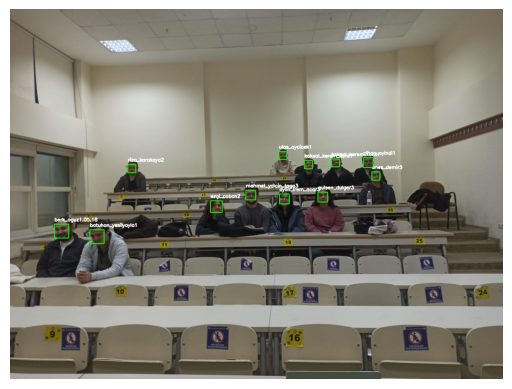

In [9]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name, attendance_list):
    if name not in attendance_list:
        with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
            now = datetime.now()
            dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
            file.write(f"{name},{dt_string}\n")
        attendance_list.add(name)
        print(f"Yoklama kaydedildi: {name}")
    else:
        print(f"{name} zaten yoklama kaydedilmiş.")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class4.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Yoklama listesi
    attendance_list = set()

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name, attendance_list)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()


Yoklama kaydedildi: riza_karakaya2
Yoklama kaydedildi: berk_oguz1.05.18
Yoklama kaydedildi: mehmet_yalcin_taga3
Yoklama kaydedildi: cihan_ayindi1
Yoklama kaydedildi: X
Yoklama kaydedildi: enes_demir3
Yoklama kaydedildi: ulas_aycicek1
Yoklama kaydedildi: ezgi_coban2
Yoklama kaydedildi: batuhan_yesilyayla1
Yoklama kaydedildi: koksal_kerem_tanil1
Yoklama kaydedildi: gulsen_dulger3
ulas_aycicek1 zaten yoklama kaydedilmiş.


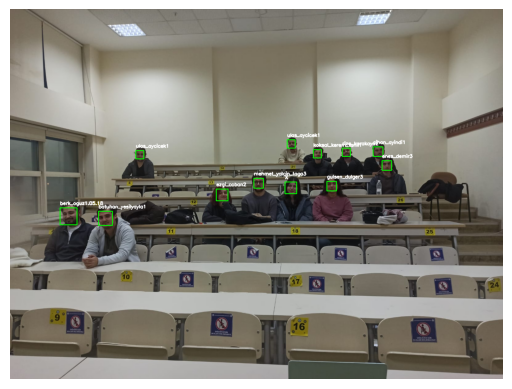

In [10]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

# 1. Öğrencilerin yüz bilgilerini yükleme
def load_known_faces_and_names(known_faces_path):
    known_encodings = []
    known_names = []
    for file_name in os.listdir(known_faces_path):
        if file_name.endswith((".jpg", ".png", ".jpeg", ".webp")):
            image = face_recognition.load_image_file(f"{known_faces_path}/{file_name}")
            encoding = face_recognition.face_encodings(image)
            if encoding:  # Eğer yüz bulunmuşsa
                known_encodings.append(encoding[0])  # İlk yüzü alıyoruz
                known_names.append(os.path.splitext(file_name)[0])  # Dosya adı isim olarak kullanılır
    return known_encodings, known_names

# 2. Yoklama kaydı
def mark_attendance(name, attendance_list):
    if name not in attendance_list:
        with open("/Users/gokcesoylu/AttendanceSystem/class_attendance.csv", "a") as file:
            now = datetime.now()
            dt_string = now.strftime("%Y-%m-%d %H:%M:%S")
            file.write(f"{name},{dt_string}\n")
        attendance_list.add(name)
        print(f"Yoklama kaydedildi: {name}")
    else:
        print(f"{name} zaten yoklama kaydedilmiş.")

# Görüntüyü yeniden boyutlandırma (büyütmek için kullanılıyor)
def resize_image(image, scale=1.5):
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    return cv2.resize(image, (width, height))

# Histogram eşitleme (görüntü netliğini artırır)
def enhance_image(image):
    image_yuv = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
    return cv2.cvtColor(image_yuv, cv2.COLOR_YUV2BGR)

def main():
    known_faces_path = "/Users/gokcesoylu/AttendanceSystem/known_faces"
    known_encodings, known_names = load_known_faces_and_names(known_faces_path)

    test_image_path = "/Users/gokcesoylu/AttendanceSystem/test_images/class2.jpeg"
    test_image = cv2.imread(test_image_path)

    # Görüntüyü büyüt ve netliğini artır
    enhanced_image = enhance_image(test_image)
    resized_test_image = resize_image(enhanced_image, scale=1.5)
    rgb_test_image = cv2.cvtColor(resized_test_image, cv2.COLOR_BGR2RGB)

    # Yoklama listesi
    attendance_list = set()

    # Görüntüdeki yüzleri tanıma
    face_locations = face_recognition.face_locations(rgb_test_image, model="cnn")  # CNN modeli ile algılama
    face_encodings = face_recognition.face_encodings(rgb_test_image, face_locations)

    # Yüz tanıma işlemi
    for face_encoding, face_location in zip(face_encodings, face_locations):
        matches = face_recognition.compare_faces(known_encodings, face_encoding)
        name = "X"
        face_distances = face_recognition.face_distance(known_encodings, face_encoding)

        if len(face_distances) > 0:
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_names[best_match_index]

        mark_attendance(name, attendance_list)

        # Tanınan yüzlerin üzerine etiket ekleme
        (top, right, bottom, left) = [int(coord / 1.5) for coord in face_location]  # Koordinatları eski boyuta uyarla
        cv2.rectangle(test_image, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.putText(test_image, name, (left, top - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)

    # Test görüntüsünü gösterme
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
    plt.imshow(test_image_bgr)
    plt.axis("off")
    plt.show()

if __name__ == "__main__":
    main()
